In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from rdkit.Chem import MolFromMolBlock
from rdkit.Chem.Draw import MolToImage
import feather

In [2]:
train = feather.read_dataframe('../data/input/train.feather')
structures = feather.read_dataframe('../data/input/structures.feather')

In [3]:
test = feather.read_dataframe('../data/input/test.feather')

In [14]:
train.drop('scalar_coupling_constant', axis=1, inplace=True)

In [15]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type
0,0,dsgdb9nsd_000001,1,0,1JHC
1,1,dsgdb9nsd_000001,1,2,2JHH
2,2,dsgdb9nsd_000001,1,3,2JHH
3,3,dsgdb9nsd_000001,1,4,2JHH
4,4,dsgdb9nsd_000001,2,0,1JHC


In [4]:
test.head(20)

,id,molecule_name,atom_index_0,atom_index_1,type
0,4658147,dsgdb9nsd_000004,2,0,2JHC
1,4658148,dsgdb9nsd_000004,2,1,1JHC
2,4658149,dsgdb9nsd_000004,2,3,3JHH
3,4658150,dsgdb9nsd_000004,3,0,1JHC
4,4658151,dsgdb9nsd_000004,3,1,2JHC
5,4658152,dsgdb9nsd_000015,3,0,1JHC
6,4658153,dsgdb9nsd_000015,3,2,3JHC
7,4658154,dsgdb9nsd_000015,3,4,2JHH
8,4658155,dsgdb9nsd_000015,3,5,2JHH
9,4658156,dsgdb9nsd_000015,4,0,1JHC


In [18]:
total = pd.concat([train, test], axis=0)
total['molecule_name'].nunique()

130775

In [5]:
structures.head(10)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397
5,dsgdb9nsd_000002,0,N,-0.040426,1.024108,0.062564
6,dsgdb9nsd_000002,1,H,0.017257,0.012545,-0.027377
7,dsgdb9nsd_000002,2,H,0.915789,1.358745,-0.028758
8,dsgdb9nsd_000002,3,H,-0.520278,1.343532,-0.775543
9,dsgdb9nsd_000003,0,O,-0.034360,0.977540,0.007602


In [ ]:
#want to calculate distance from 5 closest atoms, per each atom

In [6]:
structures['atom'].unique()

array(['C', 'H', 'N', 'O', 'F'], dtype=object)

In [ ]:
m = 'dsgdb9nsd_000001'
for 

In [7]:
with open('../data/input/structures/dsgdb9nsd_000002.mol', 'r') as mol:
    m = MolFromMolBlock(mol.read(), removeHs=False)

In [ ]:
def calc_atom_neighbor_feature(atom):
    feat = {}
    nb = [a for a in atom.GetNeighbors()] 
    nb_h = sum([a.GetSymbol() == 'H' for a in nb]) 
    nb_o = sum([a.GetSymbol() == 'O' for a in nb]) 
    nb_c = sum([a.GetSymbol() == 'C' for a in nb]) 
    nb_n = sum([a.GetSymbol() == 'N' for a in nb]) 
    nb_other = len(nb) - nb_h - nb_o - nb_n - nb_c

    feat['neighbor_count_h'] = nb_h
    feat['neighbor_count_o'] = nb_o
    feat['neighbor_count_c'] = nb_c
    feat['neighbor_count_n'] = nb_n
    feat['neighbor_count_other'] = nb_other
    feat['neighbor_degree_mean'] = np.mean([a.GetDegree() for a in nb])
    feat['neighbor_is_aromatic_mean'] = np.mean([a.GetIsAromatic() for a in nb]) 
    feat['neighbor_is_aromatic_count'] = sum([a.GetIsAromatic() for a in nb])
    feat['neighbor_in_ring_mean'] = np.mean([a.IsInRing() for a in nb])
    feat['neighbor_in_ring_count'] = sum([a.IsInRing() for a in nb])
    feat['neighbor_in_ring3_mean'] = np.mean([a.IsInRingSize(3) for a in nb]) 
    feat['neighbor_in_ring3_count'] = sum([a.IsInRingSize(3) for a in nb])
    feat['neighbor_in_ring4_mean'] = np.mean([a.IsInRingSize(4) for a in nb]) 
    feat['neighbor_in_ring4_count'] = sum([a.IsInRingSize(4) for a in nb])
    feat['neighbor_in_ring5_mean'] = np.mean([a.IsInRingSize(5) for a in nb])
    feat['neighbor_in_ring5_count'] = sum([a.IsInRingSize(5) for a in nb])
    feat['neighbor_in_ring6_mean'] = np.mean([a.IsInRingSize(6) for a in nb])
    feat['neighbor_in_ring6_count'] = sum([a.IsInRingSize(6) for a in nb])
    feat['neighbor_in_ring7_mean'] = np.mean([a.IsInRingSize(7) for a in nb])
    feat['neighbor_in_ring7_count'] = sum([a.IsInRingSize(7) for a in nb])
    feat['neighbor_in_ring8_mean'] = np.mean([a.IsInRingSize(8) for a in nb])
    feat['neighbor_in_ring8_count'] = sum([a.IsInRingSize(8) for a in nb])


    return feat


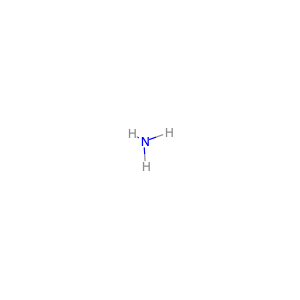

In [8]:
MolToImage(m)

In [10]:
dir(a)

['ClearProp',
 'DescribeQuery',
 'GetAtomMapNum',
 'GetAtomicNum',
 'GetBonds',
 'GetBoolProp',
 'GetChiralTag',
 'GetDegree',
 'GetDoubleProp',
 'GetExplicitBitVectProp',
 'GetExplicitValence',
 'GetFormalCharge',
 'GetHybridization',
 'GetIdx',
 'GetImplicitValence',
 'GetIntProp',
 'GetIsAromatic',
 'GetIsotope',
 'GetMass',
 'GetMonomerInfo',
 'GetNeighbors',
 'GetNoImplicit',
 'GetNumExplicitHs',
 'GetNumImplicitHs',
 'GetNumRadicalElectrons',
 'GetOwningMol',
 'GetPDBResidueInfo',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetSmarts',
 'GetSymbol',
 'GetTotalDegree',
 'GetTotalNumHs',
 'GetTotalValence',
 'GetUnsignedProp',
 'HasProp',
 'HasQuery',
 'InvertChirality',
 'IsInRing',
 'IsInRingSize',
 'Match',
 'NeedsUpdatePropertyCache',
 'SetAtomMapNum',
 'SetAtomicNum',
 'SetBoolProp',
 'SetChiralTag',
 'SetDoubleProp',
 'SetExplicitBitVectProp',
 'SetFormalCharge',
 'SetHybridization',
 'SetIntProp',
 'SetIsAromatic',
 'SetIsotope',
 'SetMonomerInfo',
 'SetNoImplicit',
 '

In [12]:
a.GetPositions()

AttributeError: 'Atom' object has no attribute 'GetPositions'

In [ ]:
m.GetNumAtoms()

In [9]:
for i in range(4):
    a = m.GetAtomWithIdx(i)
    print(a.GetAtomicNum())

7
1
1
1


In [ ]:
feat = calc_atom_neighbor_feature(a)

In [ ]:
feat

In [ ]:
for a in m.GetAtoms():
    print(a.GetNeighbors())

In [ ]:
a = m.GetAtoms()[0]
dir(a)

In [ ]:
a.GetNumRadicalElectrons()

In [ ]:
help(a.GetIsAromatic)

In [ ]:
tmp = train.merge(structures, left_on=['molecule_name', 'atom_index_0'], right_on=['molecule_name', 'atom_index'])
tmp.head()

In [ ]:
tmp['atom'].value_counts()

In [ ]:
train.dtypes == object

In [ ]:
list(train.columns[train.dtypes == object])

In [ ]:
ct = feather.read_dataframe('../features/AtomEnvironment_test.feather')

In [ ]:
ct.head()

In [ ]:
for col in ct.columns:
    if None in ct[col]:
        print(col)

In [ ]:
ct.shape

In [ ]:
ct['a0_is_aromatic'].value_counts()

In [ ]:
tr = feather.read_dataframe('../features/AtomNeighbors_train.feather')
te = feather.read_dataframe('../features/AtomEnvironment_test.feather')

In [ ]:
tr

In [ ]:
mode = tr['a1_is_aromatic'].dropna().mode()

In [ ]:
mode

In [ ]:
mode[0]

In [ ]:
te[te['a1_is_aromatic'].isnull()]

In [ ]:
te['a1_is_aromatic'].fillna(mode[0],  inplace=True)

In [ ]:
te[te['a1_is_aromatic'].isnull()]

In [ ]:
tr['a1_is_aromatic'].fillna(False,  inplace=True)

In [ ]:
tr[tr['a1_is_aromatic'].isnull()]

In [ ]:
tr['a1_is_aromatic'].value_counts().sum()

In [ ]:
tr.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder

tr = tr[~tr.isnull().any(axis=1)]

le = LabelEncoder()

tr['a1_is_aromatic'] = le.fit_transform(tr['a1_is_aromatic'])
te['a1_is_aromatic'] = le.transform(te['a1_is_aromatic'])

In [ ]:
te